Our goal will be to fit models that identify the Sativa types from the Indica types, and then to fit models that also distinguish the Hybrid types.

IMPORTANT: In this assignment, you do not need to consider different feature sets. Normally, this would be a good thing to try - but for this homework, simply include all the predictors for every model.


In [47]:
#general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#scikit libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


#warnings
import warnings
warnings.filterwarnings("ignore", message="Variables are collinear")

In [48]:
#reading in the data
data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Labs/cannabis_full.csv")

## Part One: Binary Classification

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

    - accuracy

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [49]:
#function creation
def find_best_model(data, targets, model_type):
    """
    Trains and tunes the best binary classification model for the given type.
    
    Parameters:
        data (pd.DataFrame): Input dataset with 'Type' and 'Rating' columns.
        targets: A list indicating the strains of cannabis the user wants to target.
        model_type (str): Model type to train ('lda', 'qda', 'svc', 'svm', 'knn').
        
    Returns:
        dict: Contains the best fitted model, cross-validated accuracy, and confusion matrix.
    """
    #filter data for cannabis strains
    datasi = data[data["Type"].isin(targets)]
    
    #standardize rating column (only numeric, others are dummies)
    scaler = StandardScaler()
    datasi["Rating"] = scaler.fit_transform(datasi[["Rating"]])
    
    #predictors and response
    X = datasi.drop(columns=["Type", "Strain", "Effects", "Flavor"])
    y = datasi["Type"]
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #lda model
    if model_type == "lda":
        #cross validation
        model = LDA()
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
        
        #fit the model
        model.fit(X_train, y_train)

    #qda model  
    elif model_type == "qda":
        #tune regularization parameter
        params = {"reg_param": np.linspace(0, 1, 10)}
        model = GridSearchCV(QDA(), param_grid=params, cv=5, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_

    #svc model    
    elif model_type == "svc":
        #tune c and kernel
        params = {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
        model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_

    #svm model    
    elif model_type == "svm":
        #tune parameters for polynomial kernel
        params = {
            "C": [0.1, 1, 10],
            "degree": [2, 3, 4],
            "gamma": ["scale", "auto"],
            "coef0": [0, 1]
        }
        model = GridSearchCV(SVC(kernel="poly"), param_grid=params, cv=5, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_
    
    #knn model
    elif model_type == "knn":
        #tune clusters
        params = {"n_neighbors": range(1, 21)} 
        model = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_
    
    else:
        raise ValueError("Invalid model_type. Choose from 'lda', 'qda', 'svc', 'svm', 'knn'.")
    
    #evaluate the final model on the test set
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        "model": model,
        "cv_accuracy": np.mean(cv_scores) if model_type in ["lda", "knn"] else cv_scores,
        "confusion_matrix": cm
    }


### Q1: LDA

In [50]:
data = data.dropna()
#call the function for LDA model
result_lda = find_best_model(data, targets = ["indica", "sativa"], model_type="lda")
print("Cross-validated Accuracy:", result_lda["cv_accuracy"])
print("Confusion Matrix:\n", result_lda["confusion_matrix"])


<positron-console-cell-50>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cross-validated Accuracy: 0.8583625730994152
Confusion Matrix:
 [[121  12]
 [ 17  64]]
Cross-validated Accuracy: 0.8583625730994152
Confusion Matrix:
 [[121  12]
 [ 17  64]]


### Q2: QDA

In [51]:
result_qda = find_best_model(data, targets = ["indica", "sativa"], model_type="qda")
print("Cross-validated Accuracy:", result_qda["cv_accuracy"])
print("Confusion Matrix:\n", result_qda["confusion_matrix"])

<positron-console-cell-51>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cross-validated Accuracy: 0.854798761609907
Confusion Matrix:
 [[119  14]
 [ 15  66]]
Cross-validated Accuracy: 0.854798761609907
Confusion Matrix:
 [[119  14]
 [ 15  66]]


### Q3: SVC

In [52]:
result_svc = find_best_model(data, targets = ["indica", "sativa"], model_type="svc")
print("Cross-validated Accuracy:", result_svc["cv_accuracy"])
print("Confusion Matrix:\n", result_svc["confusion_matrix"])

<positron-console-cell-52>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cross-validated Accuracy: 0.8630271757825938
Confusion Matrix:
 [[120  13]
 [ 15  66]]
Cross-validated Accuracy: 0.8630271757825938
Confusion Matrix:
 [[120  13]
 [ 15  66]]


### Q4: SVM

In [53]:
result_svm = find_best_model(data, targets = ["indica", "sativa"], model_type="svm")
print("Cross-validated Accuracy:", result_svm["cv_accuracy"])
print("Confusion Matrix:\n", result_svm["confusion_matrix"])

<positron-console-cell-53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cross-validated Accuracy: 0.8665428276573788
Confusion Matrix:
 [[120  13]
 [ 14  67]]
Cross-validated Accuracy: 0.8665428276573788
Confusion Matrix:
 [[120  13]
 [ 14  67]]


## Part Two: Natural Multiclass

Now use the full dataset, including the Hybrid strains.

### Q1

Fit a decision tree, plot the final fit, and interpret the results.

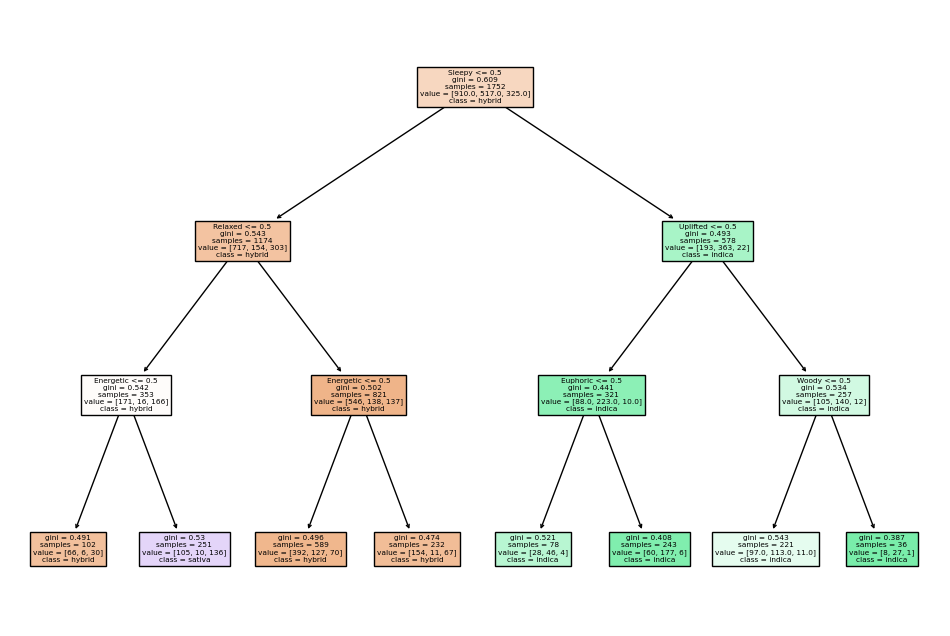

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.6127562642369021
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.6127562642369021


In [54]:
#predictors and target
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = data["Type"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#tune decision tree
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

#fit the best model
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

#plot the tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X.columns, class_names=best_tree.classes_, filled=True)
plt.show()

#print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", best_tree.score(X_test, y_test))

Split 1: Sleepy ≤ 0.5
The root node splits the data based on the feature Sleepy.
If Sleepy ≤ 0.5:
The tree proceeds to evaluate other features like Relaxed (left branch).
If Sleepy > 0.5:
The tree predicts hybrid (as this seems to dominate in this branch).
This split indicates that strains where users report less "Sleepy" effects (value ≤ 0.5) will be further analyzed to distinguish their type. Strains where users feel "Sleepy" more often tend to be classified as hybrid.

Split 2: Relaxed ≤ 0.3 (Left Branch from Split 1)
For strains where Sleepy ≤ 0.5, the next split is on Relaxed.
If Relaxed ≤ 0.3:
The tree checks Energetic to further split.
If Relaxed > 0.3:
The tree predicts or continues splitting based on other features.
This suggests that the amount of relaxation (low vs. high) is a critical factor in distinguishing strains.

Split 3: Uplifted ≤ 0.3 (Right Branch from Split 1)
For strains where Sleepy > 0.5, the next split is on Uplifted.
If Uplifted ≤ 0.3:
Further features like Woody are checked.
If Uplifted > 0.3:
The strains are classified into indica or another branch.
This indicates that whether users feel uplifted plays a significant role in distinguishing certain types of strains (likely indica).

The first few splits focus on user-reported effects (Sleepy, Relaxed, Uplifted), suggesting that the effects have high predictive power in distinguishing between strain types. Lower levels of Sleepy and Relaxed are associated with more nuanced splits, while higher levels lead to direct predictions. The decision tree seems to classify strains primarily into types like hybrid and indica.

### Q2

Repeat the analyses from Part One for LDA, QDA, and KNN.

#### LDA

In [55]:
result_lda2 = find_best_model(data, targets = ["indica", "sativa", "hybrid"], model_type="lda")
print("Cross-validated Accuracy:", result_lda2["cv_accuracy"])
print("Confusion Matrix:\n", result_lda2["confusion_matrix"])

Cross-validated Accuracy: 0.6324330484330485
Confusion Matrix:
 [[138  42  33]
 [ 51  90   1]
 [ 49   4  31]]
Cross-validated Accuracy: 0.6324330484330485
Confusion Matrix:
 [[138  42  33]
 [ 51  90   1]
 [ 49   4  31]]


#### QDA

In [56]:
result_qda2 = find_best_model(data, targets = ["indica", "sativa", "hybrid"], model_type="qda")
print("Cross-validated Accuracy:", result_qda2["cv_accuracy"])
print("Confusion Matrix:\n", result_qda2["confusion_matrix"])

Cross-validated Accuracy: 0.6267024827024827
Confusion Matrix:
 [[154  37  22]
 [ 51  91   0]
 [ 61   4  19]]
Cross-validated Accuracy: 0.6267024827024827
Confusion Matrix:
 [[154  37  22]
 [ 51  91   0]
 [ 61   4  19]]


#### KNN

In [57]:
result_knn = find_best_model(data, targets = ["indica", "sativa", "hybrid"], model_type="knn")
print("Cross-validated Accuracy:", result_knn["cv_accuracy"])
print("Confusion Matrix:\n", result_knn["confusion_matrix"])

Cross-validated Accuracy: 0.6267155067155066
Confusion Matrix:
 [[158  38  17]
 [ 60  82   0]
 [ 68   4  12]]
Cross-validated Accuracy: 0.6267155067155066
Confusion Matrix:
 [[158  38  17]
 [ 60  82   0]
 [ 68   4  12]]


### Q3

Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

The accuracies are worse than Part One, with cross-validated accuracy values hovering around 0.63 compared to 0.86 in the previous part, which makes sense because hybrid is likely to be mixed up with either Sativa or Indica strains (depending on which tilt the strain has). The confusion matrices suggest that Hybrid and Sativa are the most likely categories to be misclassified, as seen by the frequent off-diagonal values between these two types. This could be due to overlapping characteristics in the features, making it challenging for the model to distinguish between Hybrid and Sativa strains.

## Part Three: Multiclass from Binary

Consider two models designed for binary classification: SVC and Logistic Regression.

### Q1

Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

#### SVC Model OVR

In [58]:
#predictors and target
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = data["Type"]
class_labels = ["indica", "sativa", "hybrid"]

#loop for svc
for label in class_labels:
    #binary target for the class to loop
    y_binary = np.where(y == label, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=1)
    
    #train svc
    svc = SVC(probability=True, random_state=1)
    svc.fit(X_train, y_train)
    
    #evaluate
    y_pred = svc.predict(X_test)
    print(f"Metrics for SVC: {label} vs. Not {label}")
    print(classification_report(y_test, y_pred))


Metrics for SVC: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       307
           1       0.61      0.71      0.66       132

    accuracy                           0.77       439
   macro avg       0.74      0.76      0.74       439
weighted avg       0.79      0.77      0.78       439

Metrics for SVC: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       307
           1       0.61      0.71      0.66       132

    accuracy                           0.77       439
   macro avg       0.74      0.76      0.74       439
weighted avg       0.79      0.77      0.78       439



Metrics for SVC: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439

Metrics for SVC: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for SVC: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       214
           1       0.58      0.76      0.66       225

    accuracy                           0.60       439
   macro avg       0.61      0.60      0.59       439
weighted avg       0.61      0.60      0.59       439

Metrics for SVC: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       214
           1       0.58      0.76      0.66       225

    accuracy                           0.60       439
   macro avg       0.61      0.60      0.59       439
weighted avg       0.61      0.60      0.59       439



#### Logistic Model OVR

In [59]:
from sklearn.linear_model import LogisticRegression
#logstic regression loop
for label in class_labels:
    #binary target for current class
    y_binary = np.where(y == label, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=1)
    
    #train logistic model
    lr = LogisticRegression(random_state=1)
    lr.fit(X_train, y_train)
    
    #evaluate
    y_pred = lr.predict(X_test)
    print(f"Metrics for Logistic Regression: {label} vs. Not {label}")
    print(classification_report(y_test, y_pred))


Metrics for Logistic Regression: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       307
           1       0.65      0.64      0.65       132

    accuracy                           0.79       439
   macro avg       0.75      0.75      0.75       439
weighted avg       0.79      0.79      0.79       439

Metrics for Logistic Regression: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       357
           1       0.57      0.35      0.44        82

    accuracy                           0.83       439
   macro avg       0.72      0.65      0.67       439
weighted avg       0.81      0.83      0.81       439

Metrics for Logistic Regression: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       214
           1       0.61      0.68      0.64       225

    accuracy     

### Q2

Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The model that did the best job distinguishing the target category from the rest was sativa vs. not sativa logistic regression model. The model that did the worst was the hybrid vs. not hybrid SVC model. This makes intuitive sense because hybrid cannabis strains share traits with both indica and sativa, making them less distinct and thus more difficult to classify.

### Q3

Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

Indica vs. Sativa

Indica vs. Hybrid

Hybrid vs. Sativa

#### SVC OVO

In [60]:
#identify ovo pairs
class_pairs = [("indica", "sativa"), ("indica", "hybrid"), ("hybrid", "sativa")]

#loop over pairs
for class1, class2 in class_pairs:
    #filter dataset for the pair
    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]
    
    #convert target to binary
    y_binary = np.where(y_filtered == class1, 1, 0)
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_binary, test_size=0.2, stratify=y_binary, random_state=1)
    
    #train model
    svc = SVC(probability=True, random_state=1)
    svc.fit(X_train, y_train)
    
    #evaluate
    y_pred = svc.predict(X_test)
    print(f"Metrics for SVC: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for SVC: indica vs. sativa
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.87      0.89      0.88       132

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

Metrics for SVC: indica vs. sativa
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.87      0.89      0.88       132

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214



Metrics for SVC: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       225
           1       0.63      0.67      0.65       132

    accuracy                           0.73       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.74      0.73      0.74       357

Metrics for SVC: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       225
           1       0.63      0.67      0.65       132

    accuracy                           0.73       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.74      0.73      0.74       357



Metrics for SVC: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.73      1.00      0.85       225

    accuracy                           0.73       307
   macro avg       0.37      0.50      0.42       307
weighted avg       0.54      0.73      0.62       307

Metrics for SVC: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.73      1.00      0.85       225

    accuracy                           0.73       307
   macro avg       0.37      0.50      0.42       307
weighted avg       0.54      0.73      0.62       307



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Logistic OVO

In [61]:
#loop through pairs defined previously
for class1, class2 in class_pairs:
    #filter dataset for pair
    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]
    
    #convert to binary
    y_binary = np.where(y_filtered == class1, 1, 0)
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_binary, test_size=0.2, stratify=y_binary, random_state=1
    )
    
    #train model
    lr = LogisticRegression(random_state=1)
    lr.fit(X_train, y_train)
    
    #evaluate
    y_pred = lr.predict(X_test)
    print(f"Metrics for Logistic Regression: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: indica vs. sativa
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        82
           1       0.87      0.86      0.87       132

    accuracy                           0.84       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214

Metrics for Logistic Regression: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       225
           1       0.67      0.62      0.64       132

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.74      0.75      0.74       357

Metrics for Logistic Regression: indica vs. sativa
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        82
           1       0.87      0.86      0.87       132

    accuracy                 

Metrics for Logistic Regression: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.57      0.30      0.40        82
           1       0.78      0.92      0.84       225

    accuracy                           0.75       307
   macro avg       0.68      0.61      0.62       307
weighted avg       0.73      0.75      0.72       307

Metrics for Logistic Regression: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.57      0.30      0.40        82
           1       0.78      0.92      0.84       225

    accuracy                           0.75       307
   macro avg       0.68      0.61      0.62       307
weighted avg       0.73      0.75      0.72       307



### Q4

Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The model that did the best at distinguishing at differentiating the two groups was the indica vs. sativa SVC model. The model that did the worst was the hybrid vs. sativa SVC model with an accuracy of 0.73. This does make intuitive sense because hybrid is a blend of indica and sativa strains. Indica and sativa strains are the most different out of the three options.

### Q5

Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

*Note: You do not actually have to run code here - you only need to look at sklearn’s documentation to see how these functions handle multiclass input.*

When using LogisticRegression from scikit-learn, the default approach for handling multiclass data is One-vs-Rest (OvR) unless you specify the multi_class parameter as 'multinomial'. OvR involves fitting one model per class, treating it against all others. On the other hand, setting multi_class='multinomial' fits a single model to handle all classes simultaneously (multinomial logistic regression).

For SVC, the default strategy for handling multiclass data is One-vs-One (OvO). This means it creates a binary classifier for each pair of classes. However, you can use the OneVsRestClassifier wrapper to explicitly use an OvR.

## References and AI

References:

- https://scikit-learn.org/stable/api/sklearn.multiclass.html

- https://scikit-learn.org/stable/

- https://scikit-learn.org/stable/modules/multiclass.html

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- https://www.polln.com/library/sativa-vs-indica-vs-hybrid-cannabis-what-to-expect#:~:text=Often%20grown%20to%20target%20specific,ratios%20of%20THC%20to%20CBD.

AI Statment:

I used AI to convert my initial code into a cohesive function, making it adaptable for analyzing all three strains in part 2. It helped me research machine learning models and identify tunable parameters, such as "C," "degree," and "gamma" for SVM, and parameters for decision trees. AI also provided inspiration for part 3 by suggesting a structured approach to compare strain pairs through loops and filtered datasets. This guidance streamlined the process of implementing and evaluating classification models effectively.
